In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from networkx.algorithms.approximation import steiner_tree
from networkx.algorithms import tree
from datetime import datetime

In [2]:
def plot(G, pos=nx.circular_layout):
    nx.draw_networkx(G,pos(G))
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos(G),edge_labels=labels)
    plt.show()

# Suggested Algorithm 1

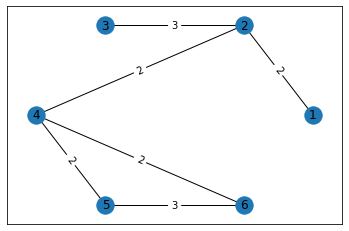

In [3]:
# init
G = nx.Graph()
# construct nodes
G.add_nodes_from(range(1,7))

# (u, v)
G.add_edges_from([(1,2), 
                  (2,3),
                  (2,4),
                  (4,5),
                  (4,6),
                  (5,6)])

# (u, v, w)
G.add_weighted_edges_from([(1,2,2), 
                           (2,3,3),
                           (2,4,2),
                           (4,5,2),
                           (4,6,2),
                           (5,6,3)])

plot(G)

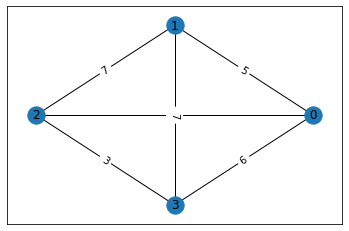

In [4]:
k4 = nx.complete_graph(3)
k4.add_weighted_edges_from([(0,1,5), 
                           (0,2,6),
                           (0,3,6),
                           (1,2,7),
                           (1,3,7),
                           (2,3,3)])
plot(k4)

In [5]:
mst = tree.minimum_spanning_edges(k4, algorithm='kruskal')
print(*mst)

(2, 3, {'weight': 3}) (0, 1, {'weight': 5}) (0, 2, {'weight': 6})


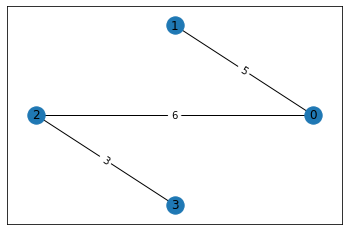

In [6]:
mst = tree.minimum_spanning_tree(k4, algorithm='kruskal')
plot(mst)

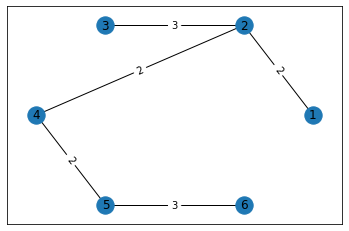

In [7]:
# init
G = nx.Graph()

# construct nodes
G.add_nodes_from(range(1,7))

G.add_weighted_edges_from([(1,2,2), 
                           (2,3,3),
                           (2,4,2),
                           (4,5,2),
                           (5,6,3)])

plot(G)

# How hard can it be? Well, VERY.
In order to achieve SOME performance what networkx actually doing is NOT looking for steiner points - it assumes the graph GIVEN is MST.
In the next couple of cells we will demonstrate the performance with and without transforming K-1000 complete graph into MST.

## Setting number of vertices of the complete graph and amount if desired terminals

In [8]:
vertices = 1000
terminals=[*map(int,range(0,1000,100))]

## Constructing the graph

In [9]:
K = nx.complete_graph(vertices)
for (u, v) in K.edges():
    K.edges[u,v]['weight'] = random.randint(0,1000)

## Timing ST on ORIGINAL

In [10]:
print('Starting Clock \n')
t = datetime.now()
steiner_tree(K, terminals)
print(datetime.now()-t)

Starting Clock 

0:08:07.523687


## Timing ST MST transformed

In [11]:
print('Starting Clock \n')
t = datetime.now()
mst = tree.minimum_spanning_tree(K, algorithm='kruskal')
steiner_tree(mst, terminals)
print(datetime.now()-t)

Starting Clock 

0:00:04.416365


## Timing MST on Original

In [12]:
print('Starting Clock \n')
t = datetime.now()
tree.minimum_spanning_tree(K, algorithm='kruskal')
print(datetime.now()-t)

Starting Clock 

0:00:01.215314


As we may expect, theoritically, MST is considered as problem in Polynomial Time execution - P.
The steiner tree problem is WAY harder to implement in order to achieve siginificant result.